In [1]:
import cv2

In [2]:
#opencv
#it changes the type to an array
img = cv2.imread('/content/German-Shepherd-dog-Alsatian.webp')

In [4]:
type(img)

NoneType

# Approach to the problem statement

* Load the libraries and images
* Visualize the images
* Declare a Sequential model
* Declare Layers
    * Convolution(Filters,
    * Pooling(Max/Avg
    * Flatten
    * Dense layer (number of neurons, activation function)
    * Output layer (activation, output shape)
* Compile the model (Optimize, Loss function)
* Fit the model (Epochs, Batch size)
* Model Evaluation

In [5]:
!wget 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

--2024-08-09 17:42:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  95.4MB/s    in 0.7s    

2024-08-09 17:42:10 (95.4 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
!unzip '/content/cats_and_dogs_filtered.zip'

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

Load the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [8]:
train_dir = '/content/cats_and_dogs_filtered/train'
test_dir = '/content/cats_and_dogs_filtered/validation'

Load the images

In [9]:
train_dataset = image_dataset_from_directory(train_dir, batch_size=64, class_names=['cats','dogs'], image_size=(160,160), seed=123)
test_dataset = image_dataset_from_directory(test_dir, batch_size=64, class_names=['cats','dogs'], image_size=(160,160), seed=123)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [10]:
class_names = train_dataset.class_names

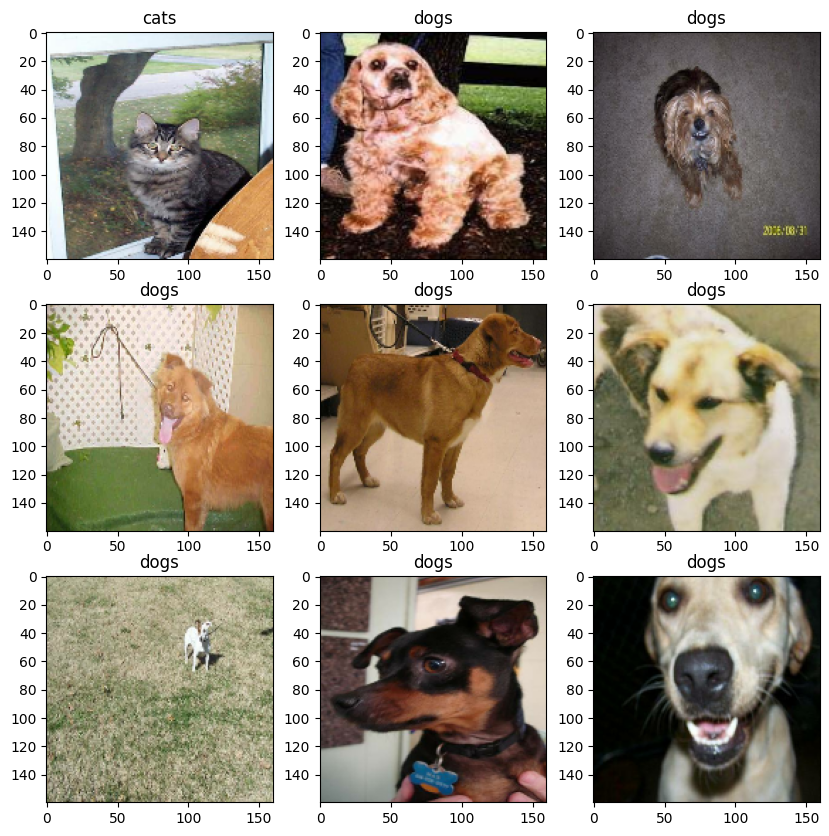

In [11]:
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

Declare the model

In [12]:
model = Sequential()
#Block 1
model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(160,160,3))) #Convolution layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) #Pooling layer
#Block 2
model.add(Conv2D(128, 3, padding='same', activation='relu')) #Convolution layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) #Pooling layer
#Block 3
model.add(Conv2D(256, 3, padding='same', activation='relu')) #Convolution layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) #Pooling layer
#Block 4
model.add(Conv2D(512, 3, padding='same', activation='relu')) #Convolution layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) #Pooling layer
################ CLASSIFICATION LAYER #########################
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 160, 160, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 80, 80, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 40, 40, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,658,689 (55.92 MB)

 Trainable params: 14,658,689 (55.92 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
hist = model.fit(train_dataset, epochs=50, validation_data=test_dataset, batch_size=32)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 621ms/step - accuracy: 0.5022 - loss: 74.6733 - val_accuracy: 0.5610 - val_loss: 0.6886
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.5348 - loss: 0.7117 - val_accuracy: 0.5480 - val_loss: 0.6895
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.5344 - loss: 0.6852 - val_accuracy: 0.5640 - val_loss: 0.6811
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.5694 - loss: 0.6799 - val_accuracy: 0.5820 - val_loss: 0.6672
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.5847 - loss: 0.6725 - val_accuracy: 0.5760 - val_loss: 0.6714
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.5991 - loss: 0.6557 - val_accuracy: 0.5680 - val_loss: 0.6723
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.6333 - loss: 0.6301 - val_accuracy: 0.6050 - val_loss: 0.6640
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.6641 - loss: 0.6024 - val_accuracy: 

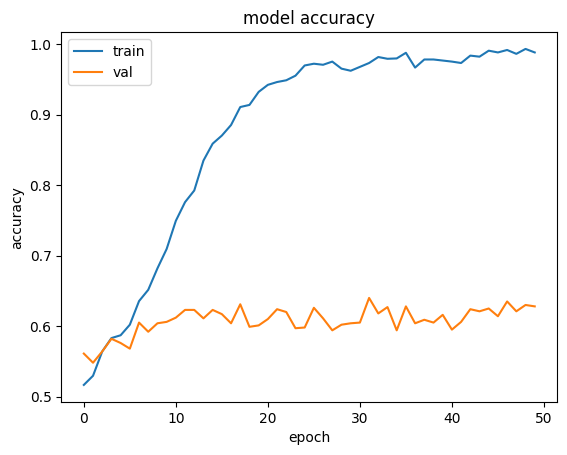

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
y_hat_train = model.predict(train_dataset)
y_hat_test = model.predict(test_dataset)

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [18]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(class_rep)

In [19]:
y_true_train = np.array([label.numpy() for _, labels in train_dataset for label in labels])
model_eval(y_true_train,y_hat_train.round())

The accuracy of the model is: 0.49
[[486 514]
 [513 487]]
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1000
           1       0.49      0.49      0.49      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [20]:
y_true_test = np.array([label.numpy() for _, labels in test_dataset for label in labels])
model_eval(y_true_test,y_hat_test.round())

The accuracy of the model is: 0.5
[[230 270]
 [230 270]]
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       500
           1       0.50      0.54      0.52       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000

